In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
import sys 
sys.path.insert(0, './')

# DATA IMPORTING

In [63]:
df = pd.read_csv('prices_round_3_day_0.csv',index_col='timestamp', sep=';')

In [64]:
df

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
100,0,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999800,0,GIFT_BASKET,71131,19,71130.0,21.0,NaN,NaN,71145,19,71146.0,21.0,NaN,NaN,71138.0,0.0
999900,0,CHOCOLATE,7987,124,NaN,NaN,NaN,NaN,7989,124,NaN,NaN,NaN,NaN,7988.0,0.0
999900,0,GIFT_BASKET,71117,2,71116.0,16.0,71115.0,18.0,71128,2,71130.0,16.0,71131.0,18.0,71122.5,0.0


In [32]:
df['INDEX'] = 4*df.loc[df['product']=='CHOCOLATE'][['mid_price']] + 6*df.loc[df['product']=='STRAWBERRIES'][['mid_price']]+loc[df['product']=='ROSES'][['mid_price']]

<>:1: SyntaxWarning: list indices must be integers or slices, not list; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not list; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not list; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not list; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not list; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not list; perhaps you missed a comma?
C:\Users\aryan\AppData\Local\Temp\ipykernel_11816\303928251.py:1: SyntaxWarning: list indices must be integers or slices, not list; perhaps you missed a comma?
  df['INDEX'] = 4*[df['product']=='CHOCOLATE'][['mid_price']] + 6*[df['product']=='STRAWBERRIES'][['mid_price']]+[df['product']=='ROSES'][['mid_price']]
C:\Users\aryan\AppData\Local\Temp\ipykernel_11816\303928251.py:1: SyntaxWarning: list i

TypeError: list indices must be integers or slices, not list

In [65]:
df_chocolate = df.loc[df['product']=='CHOCOLATE'][['mid_price']].rename(columns={'mid_price': 'chocolate'})
df_strawberries = df.loc[df['product']=='STRAWBERRIES'][['mid_price']].rename(columns={'mid_price': 'strawberries'})
df_roses = df.loc[df['product']=='ROSES'][['mid_price']].rename(columns={'mid_price': 'roses'})
df_gift_basket = df.loc[df['product']=='GIFT_BASKET'][['mid_price']].rename(columns={'mid_price': 'gift_basket'})


df = pd.concat([df_chocolate, df_strawberries, df_roses, df_gift_basket], axis=1)
df.columns = pd.MultiIndex.from_product([['mid_price'], df.columns.tolist()])
df

mid_price                                  
          chocolate strawberries    roses gift_basket
timestamp                                            
0            8000.0       4000.0  15000.0     71355.0
100          8001.5       3999.5  15000.0     71349.5
200          8001.0       3999.5  15000.5     71347.0
300          8002.5       3999.5  15000.0     71350.5
400          8002.0       3999.5  14997.5     71341.5
...             ...          ...      ...         ...
999500       7987.5       4031.0  14543.5     71141.5
999600       7988.5       4031.0  14548.0     71134.5
999700       7987.5       4031.0  14546.5     71128.5
999800       7989.5       4031.0  14546.5     71138.0
999900       7988.0       4030.5  14550.5     71122.5

[10000 rows x 4 columns]

In [68]:
df['mid_price']['gift_basket'].describe()

count    10000.000000
mean     71218.908050
std        162.745306
min      70823.500000
25%      71106.500000
50%      71221.500000
75%      71335.500000
max      71586.500000
Name: gift_basket, dtype: float64

# Returns

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

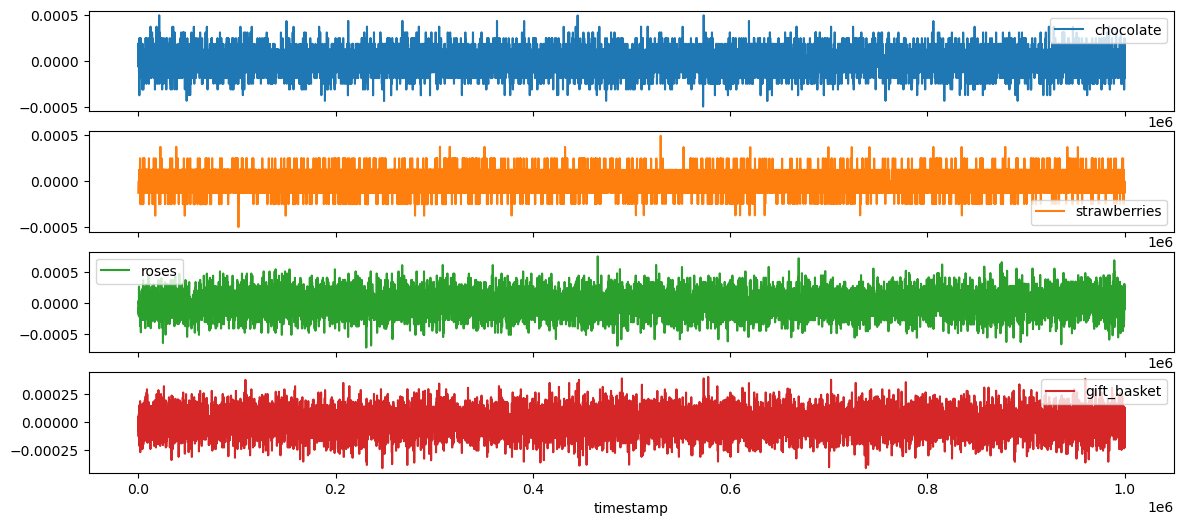

In [58]:
returns = np.log(df['mid_price']/ df['mid_price'].shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(14,6))

# #CORRELATION


array([[<Axes: xlabel='chocolate', ylabel='chocolate'>,
        <Axes: xlabel='strawberries', ylabel='chocolate'>,
        <Axes: xlabel='roses', ylabel='chocolate'>,
        <Axes: xlabel='gift_basket', ylabel='chocolate'>],
       [<Axes: xlabel='chocolate', ylabel='strawberries'>,
        <Axes: xlabel='strawberries', ylabel='strawberries'>,
        <Axes: xlabel='roses', ylabel='strawberries'>,
        <Axes: xlabel='gift_basket', ylabel='strawberries'>],
       [<Axes: xlabel='chocolate', ylabel='roses'>,
        <Axes: xlabel='strawberries', ylabel='roses'>,
        <Axes: xlabel='roses', ylabel='roses'>,
        <Axes: xlabel='gift_basket', ylabel='roses'>],
       [<Axes: xlabel='chocolate', ylabel='gift_basket'>,
        <Axes: xlabel='strawberries', ylabel='gift_basket'>,
        <Axes: xlabel='roses', ylabel='gift_basket'>,
        <Axes: xlabel='gift_basket', ylabel='gift_basket'>]], dtype=object)

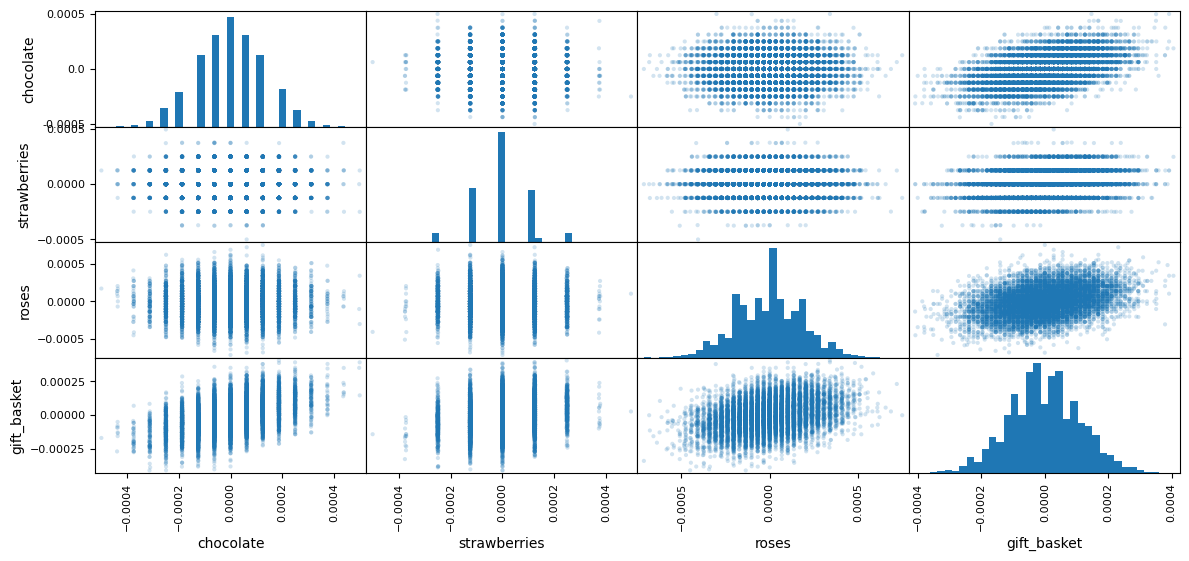

In [59]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

<Axes: >

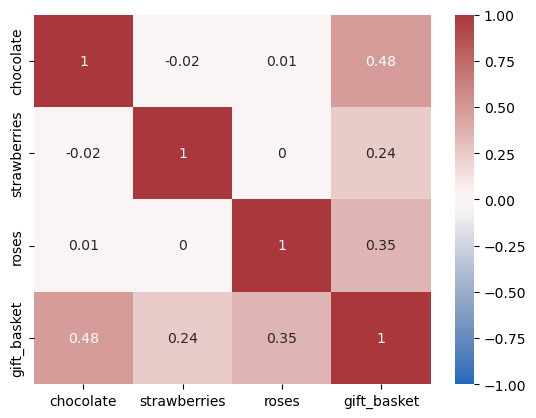

In [60]:
sns.heatmap(returns.corr().round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

In [23]:
returns.corr()

,chocolate,strawberries,roses,gift_basket
chocolate,1.000000,-0.015282,0.011934,0.481459
strawberries,-0.015282,1.000000,0.001303,0.236118
roses,0.011934,0.001303,1.000000,0.346617
gift_basket,0.481459,0.236118,0.346617,1.000000
